# Data analysis

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from matplotlib.patches import Rectangle

#plt.style.use('seaborn-dark')
#plt.style.use('dark_background')

In [2]:
clean = pd.read_csv('clean.csv')

In [3]:
# Drop columns related to the old dataframe indexation
clean = clean.drop('Unnamed: 0',axis = 1)
# Delete the unnecessary word 'fisica' from subtopic column
clean['subtopic'] = clean['subtopic'].str.replace('fisica','')


In [4]:
clean

,video_id,title,description,tags,channel_id,duration,view_count,like_count,topic,subtopic,difficulty,duration_dt,duration_seconds,score(%),normalized_score,video_quality,video_grade
0,YBt1-ry_cbw,Stoodi | Pocket Aula: Física - Movimento e Rep...,"Nessa Pocket Aula, professor Doug, de Física,...","['vestibular', 'ENEM', 'videoaulas', 'aula', '...",UCUDJR8h5P28xaN7UBEPo0VQ,PT5M19S,42501,3363.0,Cinematica,Movimento e Repouso,Easy,0 days 00:05:19.000000000,319.0,7.912755,11.122311,high,8
1,ufqQQIH2nYo,Repouso e Movimento | FÍSICA - Parte 1 | Intro...,*Ideal para alunos de Ensino Fundamental 2 e R...,"['euadorociencia', 'eu adoro ciencia', 'cienci...",UC7DL9qIVhfIyz_XtIksz89A,PT9M3S,7380,495.0,Cinematica,Movimento e Repouso,Easy,0 days 00:09:03.000000000,543.0,6.707317,9.427925,high,7
2,Zb80lraoDD4,"CINEMÁTICA - REPOUSO, MOVIMENTO E TRAJETÓRIA",#física #profgiovanelli #enem\n\nSalve Salve g...,"['trajetória', 'movimento uniforme', 'repouso ...",UCs2Aki4U0oQsEhVD9TsnlCA,PT7M27S,6132,460.0,Cinematica,Movimento e Repouso,Easy,0 days 00:07:27.000000000,447.0,7.501631,10.544427,high,7
3,yYxS0uNwbV0,9º Ano - Física - Aula 01 - Movimento e repouso,Matéria: \n- Conceitos básicos de movimento (r...,"['9º Ano', 'Física', 'Movimento', 'Ensino Fund...",UCfZrmVptdavCbKDz49c_EXQ,PT11M33S,74121,2685.0,Cinematica,Movimento e Repouso,Easy,0 days 00:11:33.000000000,693.0,3.622455,5.091788,low,3
4,canvT3BCby4,Movimento e Repouso,Neste vídeo explico como a questão de saber se...,"['física', 'cinemática', 'cinemática escalar',...",UCeKXMqEsRh0uG2mifDM6Bxw,PT4M39S,4774,257.0,Cinematica,Movimento e Repouso,Easy,0 days 00:04:39.000000000,279.0,5.383326,7.566900,average,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,69kETB2XcCc,PROVA DE FÍSICA UFU 2021/2 -1° dia - Medicina,Nesse vídeo resolveremos a prova do vestibular...,"['UFU', 'prova UFU 2020', 'resolução UFU', 'pr...",UCfZWurbbFlQrx440UtwmATg,PT13M39S,2078,67.0,Dinamica,Lei de gravitação Universal,Moderate,0 days 00:13:39.000000000,819.0,3.224254,4.532070,low,3
7054,-fxTI2dqmRg,ITA 2019 Vestibular Fase 1 Questão 03,Conheça meu curso de Física para Enem e vestib...,"['Vestibular', 'Ciências da Natureza', 'Física...",UCSdrRq5JGx2U0jAFjmKF0aA,PT7M30S,7287,589.0,Dinamica,Lei de gravitação Universal,Moderate,0 days 00:07:30.000000000,450.0,8.082887,11.361452,high,8
7055,WLGG_ObuSpc,Testando as Leis de Newton em casa | Física na...,🏆 Conheça o cursinho com FOCO em APROVAÇÃO: ht...,"['enem', 'enem 2021', 'curso enem', 'cursinho ...",UCWv7JMNjrWlVtkiBmygefHQ,PT14M22S,3814,343.0,Dinamica,Lei de gravitação Universal,Moderate,0 days 00:14:22.000000000,862.0,8.993183,12.640980,high,8
7056,Ox8q7q-GEZw,1ª e 3ª série I Física I Gravitação Universal ...,0,"['Enem', 'SAE Digital', 'Sistema', 'Ensino', '...",UCVBZBrH7bBq-Q3XvE2MaSsg,PT16M,121,6.0,Dinamica,Lei de gravitação Universal,Moderate,0 days 00:16:00.000000000,960.0,4.958678,6.970007,average,5


## Our goals

It is useful to define our goals beforehand in order to guide us in our analysis.

We want to answer the following questions:
<br/><br/>
1. Is there a correlation between time duration of the videos and the number of likes/views?
<br/><br/>
2. Which class of topics would be more rewarding to invest our attention on once we start making educational youtube videos? Hard, easy or moderate topics?
<br/><br/>
3. Once we have the answer for question 2, what specific topics are worth investing on video production for my youtube channel?

## A guessing game

Before looking at the data, it is fun and very useful to try to guess the outcome of the questions we posed. I guess the following answers:
<br/><br/>
**Answer 1:** There is a negative correlation between the time duration and the number of likes/views (score - this will be defined later on) of the videos analysed. 

That means that longer videos would catch less atention from the students than shorter ones.

While making videos for youtube I remember always becoming a bit anxious to force the video duration to be under 8 minutes precisely because of this guess. My intuition is that students have a lack of attention in general and want to learn things fast.
<br/><br/>
**Answer 2:**  **Easy** topics will have, on average, more views than **hard** topics. However, I expect **hard** topics to be better covered than **easy** ones.

The first part of the answer would happen because of the struggles students face when start learning physics. They seem to get stuck right in the beginning.

Even though easy topics would have more views I expect to find a reasonable amount of easy topics that are not well covered.

I believe people that make videos for youtube intuitively think that hard topics should get more attention, so I believe hard topics will be well covered and get less attention (views) than easy ones. If that holds on the data it will make easy topics a better target for future video production.

**Answer 3:** I can't think of a reasonable answer for this one. However, once the level of difficulty is found, we can focus only on it in order to narrow down our search for this question.

# Question 1

Is there a **negative** correlation between the 'duration_seconds' column and the 'view_count' column?

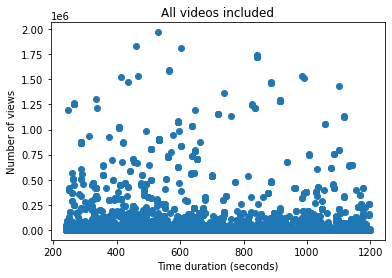

In [5]:
#'''
%matplotlib inline
plt.scatter(clean['duration_seconds'],clean['view_count'])
plt.xlabel('Time duration (seconds)')
plt.ylabel('Number of views')
plt.title('All videos included')
plt.savefig('time_corr.png')
plt.show()

#'''

There is no clear pattern we can infer.

There are three videos with more than 2.5 million views, let's take a look at them.

In [6]:
clean[clean['view_count']> 1000000]

,video_id,title,description,tags,channel_id,duration,view_count,like_count,topic,subtopic,difficulty,duration_dt,duration_seconds,score(%),normalized_score,video_quality,video_grade
8,vAgN3U36obA,Aula 01 - Cinemática - Conceitos Iniciais,Nesse vídeo vou explicar passo a passo os conc...,"['Cinemática', 'Fisica', 'Referencial', 'Traje...",UC_e7B1w8T-4ZD-QtIVAO9pg,PT9M55S,1071543,65058.0,Cinematica,Movimento e Repouso,Easy,0 days 00:09:55.000000000,595.0,6.071432,8.534113,average,6
14,UbRS2iHt-uo,COMO ENTENDER O MOVIMENTO UNIFORME? | QUER QUE...,💥 Comece a sua preparação para o Enem HOJE e d...,"['descomplica', 'enem', 'vestibular', 'ensino ...",UCT0JugAtGmqiYkwxFZOwAtg,PT4M26S,1255878,86171.0,Cinematica,Movimento e Repouso,Easy,0 days 00:04:26.000000000,266.0,6.861415,9.644528,high,7
65,a7RxDGo8Zks,Conceitos iniciais - CINEMÁTICA - Aula 1 - Pro...,#ENEM #MILITAR #FÍSICA #BOARO\nLink da PLATAFO...,"['Kinematics', 'fisica', 'Scalar', 'Professor'...",UCzshJ2mSjxhqKFBUXqP49Uw,PT18M36S,1128186,89388.0,Cinematica,Movimento e Repouso,Easy,0 days 00:18:36.000000000,1116.0,7.923162,11.136938,high,8
114,RkEnB7Ghy4c,FÍSICA - CINEMÁTICA: Velocidade Escalar Média:...,"Nessa aula, apresentamos o conceito de VELOCID...","['o estudante', 'oestudante', 'velocidade', 'e...",UCdv5kM0ZID619s3kNUIlBdg,PT12M18S,1359091,53009.0,Cinematica,Movimento e Repouso,Easy,0 days 00:12:18.000000000,738.0,3.900327,5.482370,low,4
123,Vzt2BBjqcqQ,Movimento Uniformemente Variado (Teoria e Exem...,Nesse vídeo irie iniciar o estudo do Movimento...,"['Física', 'Física 2.0', 'MUV', 'MRUV', 'Movim...",UC_e7B1w8T-4ZD-QtIVAO9pg,PT15M14S,1284713,96422.0,Cinematica,Movimento e Repouso,Easy,0 days 00:15:14.000000000,914.0,7.505334,10.549632,high,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,vAgN3U36obA,Aula 01 - Cinemática - Conceitos Iniciais,Nesse vídeo vou explicar passo a passo os conc...,"['Cinemática', 'Fisica', 'Referencial', 'Traje...",UC_e7B1w8T-4ZD-QtIVAO9pg,PT9M55S,1079208,65483.0,Dinamica,Aceleração da gravidade,Moderate,0 days 00:09:55.000000000,595.0,6.067690,8.528855,average,6
6470,dUKHRUGouL4,Notação Científica,Aula ministrada pelo professor Ítalo Benfica.\...,"['Matemática no papel', 'Notação científica', ...",UCvMdTwY9FYB3cskV9f9djoQ,PT8M51S,1969015,118294.0,Dinamica,Aceleração da gravidade,Moderate,0 days 00:08:51.000000000,531.0,6.007775,8.444637,average,6
6715,Ht-a2_yNuec,FÍSICA - ENERGIA CINÉTICA: Trabalho e Energia,Você sabia que Mecânica é o assunto física que...,"['vestibular', 'ENEM', 'videoaulas', 'energia ...",UCUDJR8h5P28xaN7UBEPo0VQ,PT14M46S,1467495,52522.0,Dinamica,Impulso e quantidade de movimento,Moderate,0 days 00:14:46.000000000,886.0,3.579024,5.030741,low,3
6740,dU14qCv5AuI,Física - Leis de Newton,Para saber mais sobre o cursinho pré-vestibula...,"['leis de newton', 'princípios da dinâmica', '...",UCuw6BCcfM1VrwSjPh1yKIJw,PT14M4S,1737379,74535.0,Dinamica,Impulso e quantidade de movimento,Moderate,0 days 00:14:04.000000000,844.0,4.290083,6.030218,low,4


Let's see what the heat map has to say about it.

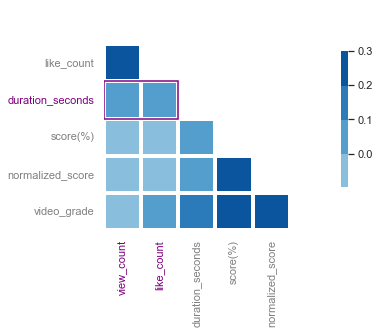

In [7]:
import matplotlib.patches as patches

#'''
sns.set_theme(style="white")
corr = clean.corr()
mask = np.triu(clean.corr())
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.color_palette("Blues")
# Erase some tick labels to reduce ink/information ratio
xticks = ax.xaxis.get_major_ticks()
xticks[5].label1.set_visible(False)
yticks = ax.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)

# xticks color grey
plt.xticks(color='grey')
# yticks color grey
plt.yticks(color='grey')


xticks[0].label1.set_color("purple")
xticks[1].label1.set_color("purple")
yticks[2].label1.set_color("purple")


# Create a Rectangle patch
rect = patches.Rectangle((0, 2), 2, 1, linewidth=1.5, edgecolor='purple', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)


#circle = plt.Circle((2.5, 4.5), 0.7, color='black', fill=False)

#ax.add_patch(circle)


sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5},
            )
plt.savefig("time_corr2.png",bbox_inches="tight") 
plt.show()
# This sets the yticks "upright" with 0, as opposed to sideways with 90.
#plt.xticks(rotation=0) 
#'''

The heat map points out precisely to the opposite of what we guessed. There is a weak *positive* correlation (less than 0.1) between the 'view_count' and 'duration_seconds' column. Also, positive correlation between the 'like_count' and 'duration_seconds' column, as we can see from the heatmap highlighted by the black circles. In fact, let's check the numbers:

In [8]:
corr = clean.corr()
corr

,view_count,like_count,duration_seconds,score(%),normalized_score,video_grade
view_count,1.000000,0.900350,0.046513,-0.095904,-0.095904,-0.091384
like_count,0.900350,1.000000,0.074972,-0.003677,-0.003677,0.037821
duration_seconds,0.046513,0.074972,1.000000,0.088823,0.088823,0.121728
score(%),-0.095904,-0.003677,0.088823,1.000000,1.000000,0.864669
normalized_score,-0.095904,-0.003677,0.088823,1.000000,1.000000,0.864669
video_grade,-0.091384,0.037821,0.121728,0.864669,0.864669,1.000000


In order to make it easier to visualize the result above, let's create a dataframe containing only the time durantion and the total number of views per one minute interval:

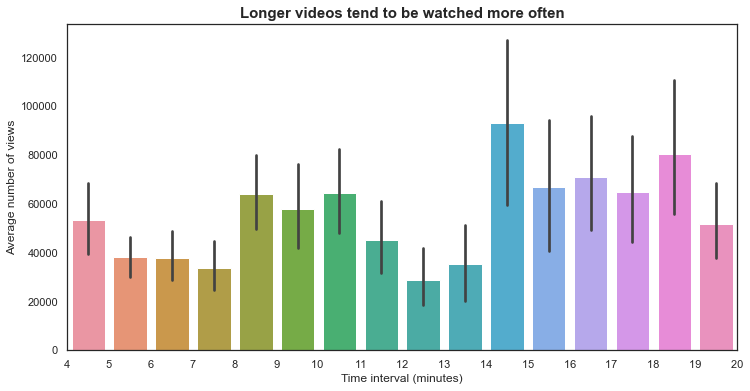

In [9]:
# Make a barplot showing the average number of views in a given time interval
plt.subplots(figsize=(12,6))
ax = sns.barplot(clean, x = pd.cut(clean['duration_seconds'], 
                              bins=[240, 300, 360, 420,480,540,600,660,720,780,840,900,960,1020,1080,1140,1200], 
                              include_lowest=True, 
                              labels = ['4            5',
                                        '              6',
                                        '              7',
                                        '              8',
                                        '              9',
                                        '             10',
                                        '              11',
                                        '              12',
                                        '              13',
                                        '              14',
                                        '              15',
                                        '              16',
                                        '              17',
                                        '              18',
                                        '              19',
                                        '              20']),
                              y = clean['view_count'])
ax.set_title('Longer videos tend to be watched more often', fontsize=15, fontweight = 'bold')
ax.set_xlabel ("Time interval (minutes)")
ax.set_ylabel ("Average number of views")
plt.savefig("positive_corr.png") 


# Partial conclusion 1

There is a weak *positive* correlation (~ 0.09) between the score of the videos and their time duration. That suggests that my anxiety to keep the videos under 8 minutes is not justified by the data. In fact, quite the opposite, as long as I stay under 20 minutes, longer videos (but shorter than 20 minutes) tend to attract more attention from students than shorter ones.

# Splitting the data

Let's see if the conclusion above holds even if we split the data set using the difficulty column as a filter.

Our goal is to find out if there is still almost no correlation (or a weak positive one) for the three data sets.

In [10]:
easy = clean[clean['difficulty'] == 'Easy']
moderate = clean[clean['difficulty'] == 'Moderate']
hard = clean[clean['difficulty'] == 'Hard']

## Easy dataset

1.1 - Is there a negative correlation between the 'duration_seconds' column and the 'view_count' and/or 'like_count' columns for the easy dataset?

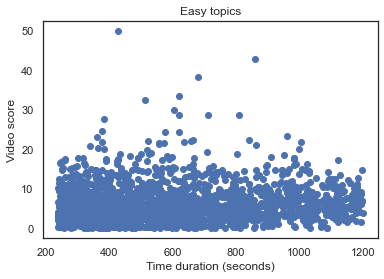

In [11]:
%matplotlib inline
#plt.style.use('dark_background')
plt.scatter(easy['duration_seconds'],easy['score(%)'])
plt.xlabel('Time duration (seconds)')
plt.ylabel('Video score')
plt.title('Easy topics')
plt.show()

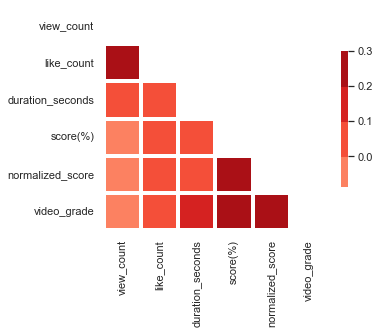

In [12]:
#'''
sns.set_theme(style="white")
corr = easy.corr()
mask = np.triu(easy.corr())
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.color_palette("Reds")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )
#'''

In [13]:
corr_easy = easy.corr()
corr_easy

,view_count,like_count,duration_seconds,score(%),normalized_score,video_grade
view_count,1.000000,0.888204,0.053849,-0.085317,-0.085317,-0.075080
like_count,0.888204,1.000000,0.093294,0.021654,0.021654,0.068130
duration_seconds,0.053849,0.093294,1.000000,0.092172,0.092172,0.134780
score(%),-0.085317,0.021654,0.092172,1.000000,1.000000,0.876026
normalized_score,-0.085317,0.021654,0.092172,1.000000,1.000000,0.876026
video_grade,-0.075080,0.068130,0.134780,0.876026,0.876026,1.000000


The weak *positive* correlation is a bit stronger here (0.1), but the conclusion is actually the same. Time duration seems to have a small positive impact for easy topics if the videos are longer.

## Moderate dataset

1.1 - Is there a negative correlation between the 'duration_seconds' column and the 'view_count' and/or 'like_count' columns for the moderate dataset?

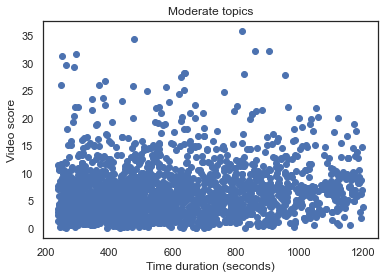

In [14]:
#'''
%matplotlib inline
#plt.style.use('dark_background')
plt.scatter(moderate['duration_seconds'],moderate['score(%)'])
plt.xlabel('Time duration (seconds)')
plt.ylabel('Video score')
plt.title('Moderate topics')
plt.show()
#'''

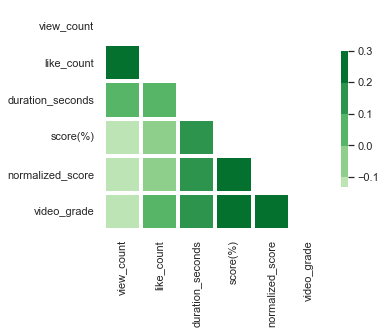

In [15]:
#'''
sns.set_theme(style="white")
corr = moderate.corr()
mask = np.triu(moderate.corr())
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.color_palette("Greens")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )
#'''

In [16]:
corr_moderate = moderate.corr()
corr_moderate

,view_count,like_count,duration_seconds,score(%),normalized_score,video_grade
view_count,1.000000,0.896630,0.041831,-0.128649,-0.128649,-0.130232
like_count,0.896630,1.000000,0.075436,-0.033619,-0.033619,0.007319
duration_seconds,0.041831,0.075436,1.000000,0.132784,0.132784,0.163763
score(%),-0.128649,-0.033619,0.132784,1.000000,1.000000,0.872673
normalized_score,-0.128649,-0.033619,0.132784,1.000000,1.000000,0.872673
video_grade,-0.130232,0.007319,0.163763,0.872673,0.872673,1.000000


The weak *positive* correlation is even a bit stronger for moderate topics (0.13), but the conclusion is actually the same. Time duration seems to have a small positive impact for moderate topics if the videos are longer.

## Hard dataset

1.1 - Is there a negative correlation between the 'duration_seconds' column and the 'view_count' and/or 'like_count' columns for the hard dataset?

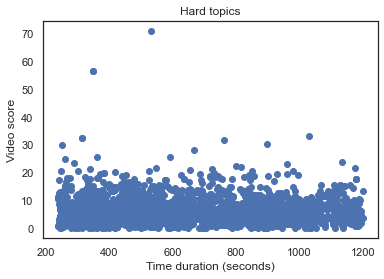

In [17]:
#'''
%matplotlib inline
#plt.style.use('dark_background')
plt.scatter(hard['duration_seconds'],hard['score(%)'])
plt.xlabel('Time duration (seconds)')
plt.ylabel('Video score')
plt.title('Hard topics')
plt.show()
#'''

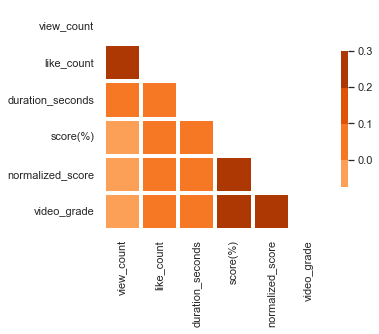

In [18]:
#'''
sns.set_theme(style="white")
corr = hard.corr()
mask = np.triu(hard.corr())
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.color_palette("Oranges")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )
#'''

In [19]:
corr_hard = hard.corr()
corr_hard

,view_count,like_count,duration_seconds,score(%),normalized_score,video_grade
view_count,1.000000,0.922324,0.051903,-0.073787,-0.073787,-0.068299
like_count,0.922324,1.000000,0.063084,0.002047,0.002047,0.039107
duration_seconds,0.051903,0.063084,1.000000,0.049069,0.049069,0.074559
score(%),-0.073787,0.002047,0.049069,1.000000,1.000000,0.848648
normalized_score,-0.073787,0.002047,0.049069,1.000000,1.000000,0.848648
video_grade,-0.068299,0.039107,0.074559,0.848648,0.848648,1.000000


Here the weak *positive* correlation is weaker (~0.05). Time duration seems to have very little to no significative impact on the score for hard topics. This means that the time duration of the videos do not have a significative impact on the score of the videos.

# Conclusion for question 1

The weak *positive* correlation between score and time duration holds even when we split the data set using the level of difficulty of each topic. 

However, easy and moderate videos have a stronger *positive* correlation, contrary to what we guessed, while the correlation is very weak for hard topics.

This suggests that when making videos for easy or moderate difficulty, longer videos (on the upper end of the 4-20 minutes interval) seems more attractive to students.

For hard topics, there is a very weak positive correlation which suggests that the length of videos do not matter as long as one stay in the 4-20 minutes interval.

# Question 2

- Which level of difficulty get more views: easy, moderate or hard ones?

We guessed that easy topics would be the winner. To answer this question, let's take a look at the average amount of views showed by the bar plot below:

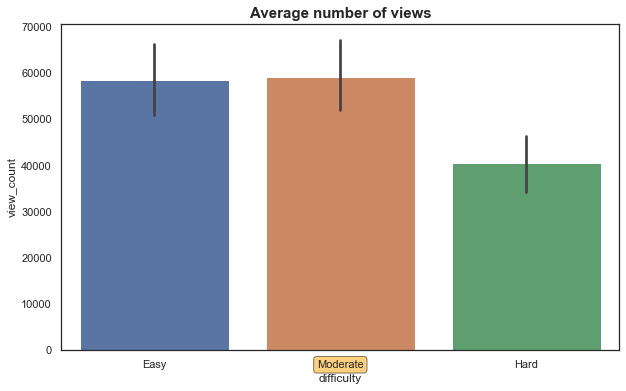

In [20]:
#sns.set_theme(style="white")
bar,ax = plt.subplots(figsize=(10,6))

# Average number of views according to their difficulty
ax = sns.barplot(data=clean, x="difficulty", y="view_count")
ax.set_title('Average number of views', fontsize=15, fontweight = 'bold')
ax.set_xlabel ("difficulty")
#ax.set_ylabel ("Percentage")

# Highlight easy videos as potential target
bbox = dict(boxstyle="round", ec='black', fc='orange', alpha=0.5)
plt.setp(ax.get_xticklabels()[1], bbox=bbox)
bar.savefig("views.png") 




Easy and moderate topics get more attention, on average, than hard ones. This corroborates with our initial guess.

In [21]:
clean['subtopic'].unique()

array(['Movimento e Repouso ', 'Movimento Uniforme ',
       'Movimento Uniformente variado ', 'Lançamento vertical para cima ',
       'Queda livre ', 'Vetores Lançamento oblíquo ',
       'Lançamento horizontal ', 'Movimento Circular ',
       'Estática de um ponto material ', 'centro de massa e equilíbrio',
       'Estática do corpo extenso ', 'Leis de Newton',
       'Forças de tração normal e peso ', 'Força elástica ',
       'Trabalho e energia mecanica', 'Força de atrito ',
       'Lei de Kepler ', 'cinematica vetorial ', 'Velocidade de escape ',
       'Aceleração da gravidade ', 'Impulso e quantidade de movimento ',
       'Lei de gravitação Universal '], dtype=object)

- Are harder topics more successfully covered by youtubers than easy ones as we guessed?

To check that we will look at the average score given by the bar plot below:

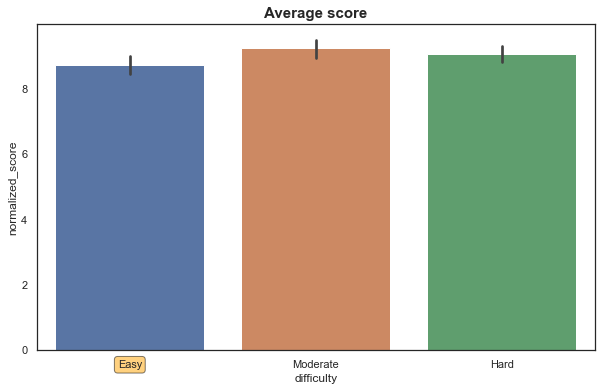

In [22]:
# Averge score according to video difficulty
plt.subplots(figsize=(10,6))
ax = sns.barplot(data= clean, x="difficulty", y="normalized_score")
ax.set_title('Average score',fontsize=15, fontweight = 'bold')
# Highlight easy videos as potential target
bbox = dict(boxstyle="round", ec='black', fc='orange', alpha=0.5)
plt.setp(ax.get_xticklabels()[0], bbox=bbox)
#ax.savefig("score.png") 
plt.savefig("avg_score_diff.png") 


Again, on average, easy topics have smaller score than hard and moderate topics. 

Neverthless, we must look into the subtopics in detail to derive any conclusions, given that the average showed by the barplots looses a lot o information.

Before doing so, let's take a closer look only at the videos that are classified as 'very high' quality:

In [23]:
# Dataframe containing only videos with very high quality videos
data = clean[clean['video_quality'] == 'very high']

In [24]:
# Count number of videos per level of difficulty only for videos of very high quality
number_videos_vhquality = data['difficulty'].value_counts(ascending=True)

In [25]:
# Count the number of videos of the total dataframe per level of difficulty
number_videos_per_difficulty = clean['difficulty'].value_counts(ascending=True)

In [26]:
# Calculate the percentage of very high quality videos per level of difficulty
percentage_data = number_videos_vhquality*100/number_videos_per_difficulty
percentage_data

Easy        18.134034
Hard        20.287044
Moderate    20.937642
Name: difficulty, dtype: float64

In [27]:
# Transform the percentage data to a dataframe to facilitate ploting
per_df = percentage_data.to_frame()
per_df = per_df.rename(columns={"difficulty": "percentage"})
per_df


,percentage
Easy,18.134034
Hard,20.287044
Moderate,20.937642


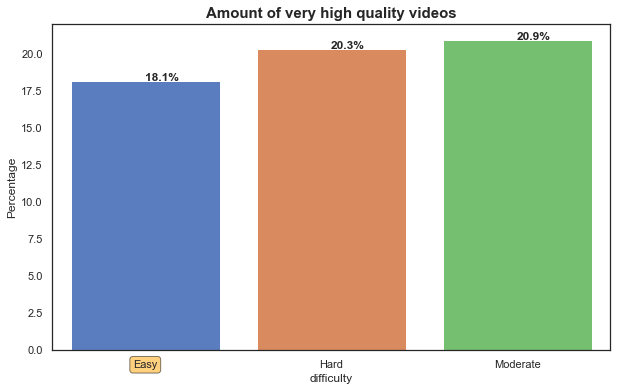

In [28]:
#Seaborn barplot
#sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=per_df.index, y='percentage', data=per_df, errorbar=None, palette="muted",orient='v', )
ax.set_title("Amount of very high quality videos", fontsize=15, fontweight = 'bold')
ax.set_xlabel ("difficulty")
ax.set_ylabel ("Percentage")

# Highlight easy videos as potential target
bbox = dict(boxstyle="round", ec='black', fc='orange', alpha=0.5)
plt.setp(ax.get_xticklabels()[0], bbox=bbox)

# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
#bar.savefig("Seaborn_Pie_Chart.png");


Here the suggestion is stronger. Easy videos seems to be a better target for invest time on youtube video production. 

# Conclusion for question 2

Easy and moderate topics are searched more often by students than hard topics. On the other hand, hard topics are, on average, better covered on youtube.

# Question 3

- What specific subtopics are worth investing on video production?

The percentage of very high quality videos for each subtopic will give a good indication to answer this question. 

In [29]:
# Count number of very high quality videos per subtopic 
vhq_per_subtopic = data['subtopic'].value_counts().sort_index(ascending =True)
vhq_per_subtopic

Aceleração da gravidade                57
Estática de um ponto material          46
Estática do corpo extenso              56
Força de atrito                        65
Força elástica                         57
Forças de tração normal e peso         25
Impulso e quantidade de movimento      66
Lançamento horizontal                  75
Lançamento vertical para cima          54
Lei de Kepler                          57
Lei de gravitação Universal            74
Leis de Newton                         66
Movimento Circular                     83
Movimento Uniforme                    105
Movimento Uniformente variado          64
Movimento e Repouso                    65
Queda livre                            68
Trabalho e energia mecanica            54
Velocidade de escape                   54
Vetores Lançamento oblíquo             84
centro de massa e equilíbrio           30
cinematica vetorial                    92
Name: subtopic, dtype: int64

In [30]:
# Count the number of videos of the total dataframe per subtopic
total_per_subtopic = clean['subtopic'].value_counts().sort_index(ascending=True)
total_per_subtopic

Aceleração da gravidade               405
Estática de um ponto material         317
Estática do corpo extenso             325
Força de atrito                       439
Força elástica                        328
Forças de tração normal e peso        280
Impulso e quantidade de movimento     292
Lançamento horizontal                 365
Lançamento vertical para cima         255
Lei de Kepler                         256
Lei de gravitação Universal           293
Leis de Newton                        231
Movimento Circular                    399
Movimento Uniforme                    438
Movimento Uniformente variado         222
Movimento e Repouso                   334
Queda livre                           380
Trabalho e energia mecanica           364
Velocidade de escape                  219
Vetores Lançamento oblíquo            313
centro de massa e equilíbrio          323
cinematica vetorial                   280
Name: subtopic, dtype: int64

In [31]:
# Calculate the percentage of very high quality videos per level of difficulty
per_vhq_subtopic = vhq_per_subtopic*100/total_per_subtopic
per_vhq_subtopic

Aceleração da gravidade               14.074074
Estática de um ponto material         14.511041
Estática do corpo extenso             17.230769
Força de atrito                       14.806378
Força elástica                        17.378049
Forças de tração normal e peso         8.928571
Impulso e quantidade de movimento     22.602740
Lançamento horizontal                 20.547945
Lançamento vertical para cima         21.176471
Lei de Kepler                         22.265625
Lei de gravitação Universal           25.255973
Leis de Newton                        28.571429
Movimento Circular                    20.802005
Movimento Uniforme                    23.972603
Movimento Uniformente variado         28.828829
Movimento e Repouso                   19.461078
Queda livre                           17.894737
Trabalho e energia mecanica           14.835165
Velocidade de escape                  24.657534
Vetores Lançamento oblíquo            26.837061
centro de massa e equilíbrio           9

In [32]:
# Transform the percentage data to a dataframe to facilitate ploting
per_df2 = per_vhq_subtopic.to_frame()
per_df2 = per_df2.rename(columns={"subtopic": "percentage"})
per_df2


,percentage
Aceleração da gravidade,14.074074
Estática de um ponto material,14.511041
Estática do corpo extenso,17.230769
Força de atrito,14.806378
Força elástica,17.378049
Forças de tração normal e peso,8.928571
Impulso e quantidade de movimento,22.602740
Lançamento horizontal,20.547945
Lançamento vertical para cima,21.176471
Lei de Kepler,22.265625


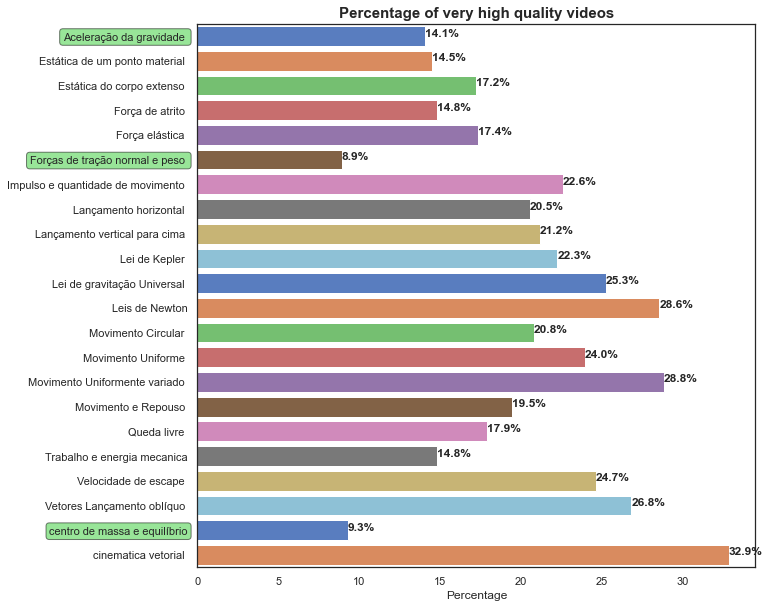

In [33]:
#Seaborn barplot
#sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(y=per_df2.index, x='percentage', data=per_df2, errorbar=None, palette="muted",orient='h', )
ax.set_title("Percentage of very high quality videos", fontsize=15,fontweight="bold")
ax.set_xlabel ("Percentage")
#ax.set_ylabel ("Subtopic")

# Highlight potential subtopics
bbox = dict(boxstyle="round", ec="black", fc="limegreen", alpha=0.5)
plt.setp([ax.get_yticklabels()[0],ax.get_yticklabels()[5],ax.get_yticklabels()[20]], bbox=bbox)

# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )#bar.savefig("Seaborn_Pie_Chart.png");
    bar.savefig("high_quality_videos_per.png",bbox_inches="tight");
    

The highlighted subtopics have less very high quality videos and would be good targets for video production. Let's see their level of difficulty:

In [34]:
clean['subtopic'].unique()

array(['Movimento e Repouso ', 'Movimento Uniforme ',
       'Movimento Uniformente variado ', 'Lançamento vertical para cima ',
       'Queda livre ', 'Vetores Lançamento oblíquo ',
       'Lançamento horizontal ', 'Movimento Circular ',
       'Estática de um ponto material ', 'centro de massa e equilíbrio',
       'Estática do corpo extenso ', 'Leis de Newton',
       'Forças de tração normal e peso ', 'Força elástica ',
       'Trabalho e energia mecanica', 'Força de atrito ',
       'Lei de Kepler ', 'cinematica vetorial ', 'Velocidade de escape ',
       'Aceleração da gravidade ', 'Impulso e quantidade de movimento ',
       'Lei de gravitação Universal '], dtype=object)

In [35]:
trabalho = clean[clean['subtopic'] == 'Aceleração da gravidade ']['difficulty'].unique()
print(trabalho)
forcas = clean[clean['subtopic'] == 'Forças de tração normal e peso ']['difficulty'].unique()
print(forcas)
CM = clean[clean['subtopic'] == 'centro de massa e equilíbrio']['difficulty'].unique()
print(CM)

['Moderate']
['Moderate']
['Hard']


It turns out that none of them are easy topics. However, as we saw moderate topics, on average, are searched as often as easy ones.

In order to classify the value of each of the three topics above, let's look at their average number of views:

[None, None, None, None, None, None]

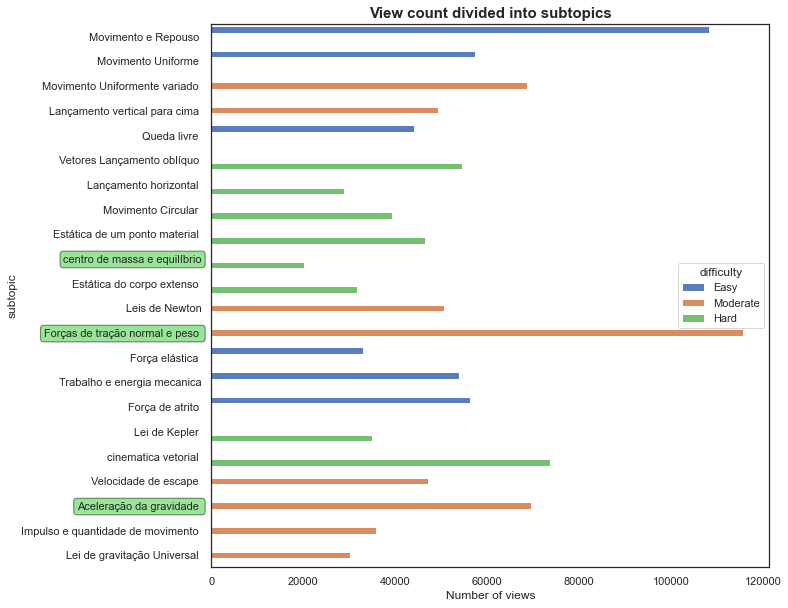

In [36]:
bar,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(y= 'subtopic', x='view_count', data= clean, errorbar=None, hue = 'difficulty', palette="muted",orient='h', )
ax.set_title("View count divided into subtopics", fontsize=15,fontweight="bold")
ax.set_xlabel ("Number of views")
# Highlight potential subtopics
bbox = dict(boxstyle="round", ec="black", fc="limegreen", alpha=0.5)
plt.setp([ax.get_yticklabels()[9],ax.get_yticklabels()[12],ax.get_yticklabels()[19]], bbox=bbox)

So, the classification of the three subtopics with highest potential for video production is:

1 - 'Forças de tração normal e peso'

This subtopic is highly searched by students and has the lowest percentage of very high quality videos. Definitely our winner in this analysis.

2 - 'Aceleração da gravidade'

This subtopic has the third lowest score, but the second highest number of views. Since it is more searched by students, it will increase the change of our video to be viewed by more often, even though there are more very high quality videos on this subtopic.

3 - 'centro de massa e equilíbrio'

This subtopic has the second lowest score, but the third highest number of views among the three videos we chose to invest our efforts in video production. It is a hard topic and usually less searched by students, and I would invest time on it only after putting efforts on the ones above.

# Summary

When making Physics videos for youtube in portuguese, I suggest the following:

- Focus on videos where time duration stays on the interval of 10 to 20 minutes.


Make videos covering the following subtopics in the following order:

1 - Forças de tração normal e peso (best subtopic);

2 - Aceleração da gravidade (second best);

3 - Centro de massa e equilíbrio (third best).